## Realistic (simulated) centroid error from a dark current blob

This notebook shows the centroid deviations that result from dithering
a star near a fixed dark current "blob" that is bright enough to
perturb the centroid and set the ACA multiple stars flag.

This is a very simple model that just considers the first-moment centroid
with two point-like sources
that have a given y, z separation and a given ratio of counts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
t_y = 1000
t_z = 707
ampl = 8
t = np.arange(5000)

In [3]:
dither_y = ampl * np.sin(t * 2 * np.pi / t_y)
dither_z = ampl * np.sin(t * 2 * np.pi / t_z)

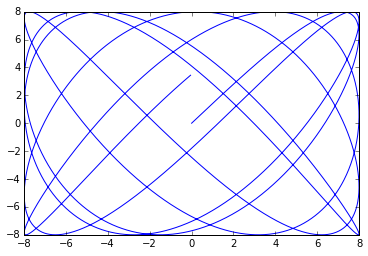

In [4]:
plt.plot(dither_y, dither_z)

In [5]:
def centroid_error(counts_star=5, ms_dy=10, ms_dz=10):
    """
    Compute relative centroid and plot, assuming:
    
    - Mult-star blob has 1.0 counts
    - Mult-star blob has initial offset of ``ms_dy`` and ``ms_dz`` arcsec
      for time=0 when the dither offset is (0, 0).
    - Guide star has ``counts_star`` counts
    - Dither amplitude is 8 arcsec
    
    This computation is done relative to the true position of the guide star,
    in effect simulating the dark current blob dithering about a fixed star.
    """
    # Location of the blob
    ms_y = ms_dy + dither_y
    ms_z = ms_dz + dither_z
    
    # First moment centroid of the star + blob combination
    # cen_y = (counts_blob * ms_y + counts_star * 0.0) / (counts_blob + counts_star)
    cen_y = ms_y / (1 + counts_star)  # (1 * ms_y + counts_star * 0) / (1 + counts_star)
    cen_z = ms_z / (1 + counts_star)  # (1 * ms_z + counts_star * 0) / (1 + counts_star)
    
    # Now plot centroid offset, and mark the first 50 points in red for reference.
    plt.plot(cen_y, cen_z)
    plt.plot(cen_y[:50], cen_z[:50], 'r')
    cm = np.max(np.abs(np.concatenate([cen_y, cen_z])))
    plt.xlim(-cm, cm)
    plt.ylim(-cm, cm)
    plt.grid()
    return cen_y, cen_z

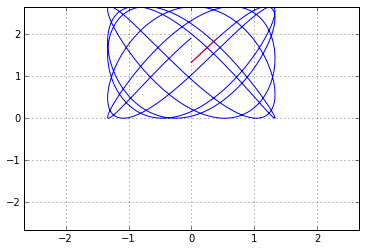

In [6]:
cen_y, cen_z = centroid_error(ms_dy=0, ms_dz=8)


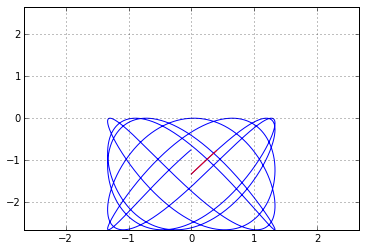

In [7]:
cen_y, cen_z = centroid_error(ms_dy=0, ms_dz=-8)

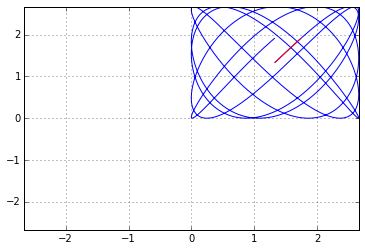

In [8]:
cen_y, cen_z = centroid_error(ms_dy=8, ms_dz=8)

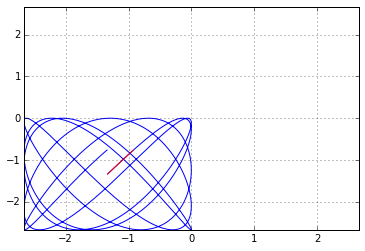

In [9]:
cen_y, cen_z = centroid_error(ms_dy=-8, ms_dz=-8)